<a href="https://colab.research.google.com/github/yustiks/IMU_sensors/blob/main/scikit_kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-kinematics

     |████████████████████████████████| 2.0MB 4.6MB/s 
     |████████████████████████████████| 11.4MB 38.5MB/s 


In [ ]:
import pandas as pd
records_acc = pd.read_csv('records_acc.csv')
records_magn = pd.read_csv('records_magn.csv')
records_gyro = pd.read_csv('records_gyro.csv')

In [ ]:
new_table = pd.merge(records_acc, records_magn, how='left', left_on='sensor_timestamp', right_on='sensor_timestamp')

In [ ]:
new_table = new_table.rename(columns={"x_x": "acc_x", "y_x": "acc_y", "z_x": "acc_z", "x_y": "magn_x", "y_y": "magn_y", "z_y": "magn_z"})

In [ ]:
new_table = pd.merge(new_table, records_gyro, how='left', left_on='sensor_timestamp', right_on='sensor_timestamp')

In [ ]:
new_table = new_table.rename(columns={"x": "gyro_x", "y": "gyro_y", "z": "gyro_z"})

In [ ]:
new_table.head()

,acc_x,acc_y,acc_z,sensor_timestamp,magn_x,magn_y,magn_z,gyro_x,gyro_y,gyro_z
0,-6.927469,3.531932,-5.082537,977035,11.229898,-145.643921,135.881516,24.045,-7.875000,16.905001
1,-7.918133,4.627884,-4.888711,977055,7.477531,-144.255219,132.227615,23.520,3.745000,13.965000
2,-8.887260,5.379257,-4.742744,977075,9.377923,-144.284393,134.592880,15.260,6.790000,7.910000
3,-9.088264,5.541975,-4.364665,977095,8.971589,-142.612473,135.592911,6.335,-4.760000,4.445000
4,-8.109566,4.955713,-4.623098,977114,12.101726,-146.335068,134.912048,1.155,-20.790001,4.690000


In [ ]:
new_table.to_csv('new_table.csv')

In [ ]:
import numpy as np
import skinematics
from skinematics.sensors.manual import MyOwnSensor
# Demonstrate how to fill up a sensor manually
records_acc['rate'] = 50
in_data = {
        'rate': 50,
        'acc': np.array(new_table.loc[:,['acc_x', 'acc_y', 'acc_z']]),
        'omega': np.array(new_table.loc[:,['gyro_x', 'gyro_y', 'gyro_z']]),
        'mag': np.array(new_table.loc[:,['magn_x', 'magn_y', 'magn_z']])
}

my_sensor = MyOwnSensor(in_file='My own 123 sensor.', in_data=in_data)

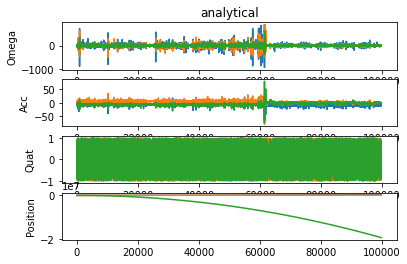

In [ ]:
import matplotlib.pyplot as plt

initial_orientation = np.array([ [1,0,0],
                                  [0,1,0],
                                  [0,0,1]])


#initial_orientation = np.array([[0,0,-1],
                                #[1, 0, 0],
                                #[0,-1,0]])
initial_position = np.r_[0,0,0]

    # By default, the orientation quaternion gets automatically calculated, using "analytical"
q_analytical = my_sensor.quat
my_sensor.calc_position()

def show_result(imu_data):
    "Dummy function, to simplify the visualization"
    
    fig, axs = plt.subplots(4,1)
    axs[0].plot(imu_data.omega)
    axs[0].set_ylabel('Omega')
    axs[0].set_title(imu_data.q_type)
    axs[1].plot(imu_data.acc)
    axs[1].set_ylabel('Acc')
    axs[2].plot(imu_data.quat[:,1:])
    axs[2].set_ylabel('Quat')
    axs[3].plot(imu_data.pos)
    axs[3].set_ylabel('Position')    
    plt.show()    
    
show_result(my_sensor)



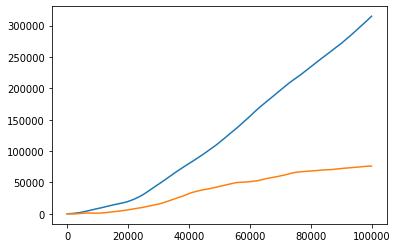

In [ ]:
plt.plot(my_sensor.pos[:, 0])
plt.plot(my_sensor.pos[:, 1])


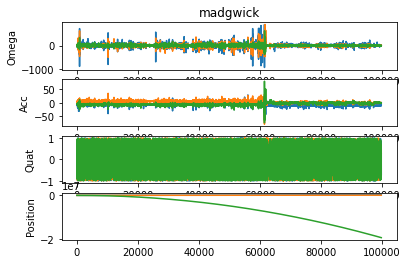

In [ ]:
show_result(my_sensor)



In [ ]:
# Automatic re-calculation of orientation if "q_type" is changed
my_sensor.set_qtype('madgwick')
q_Madgwick = my_sensor.quat


Calculating the Quaternions [#########################] 99908/99908


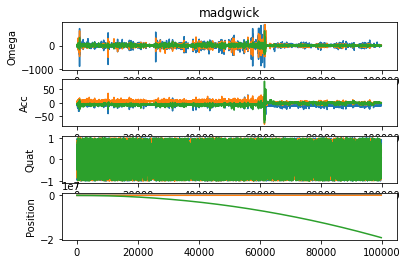

In [ ]:
show_result(my_sensor)

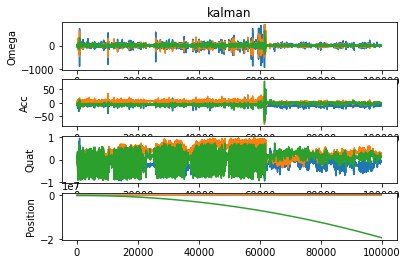

Done


In [ ]:
my_sensor.set_qtype('kalman')
q_Kalman = my_sensor.quat

show_result(my_sensor)

print('Done')